In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
# Steps

# 1. Preprocessing, Exploratory Data Analysis(EDA), Feature Slection
# 2. Extract input and output columns
# 3. Scale the values
# 4. Train test split
# 5. Train the model
# 6. Evaluate the model/ model selection
# 7. Deploy the model

In [197]:
dataset = pd.read_csv("placement.csv")
dataset.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [198]:
dataset.shape

(100, 4)

In [199]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [200]:
dataset = dataset.iloc[:, 1:]

In [201]:
dataset.head(5)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


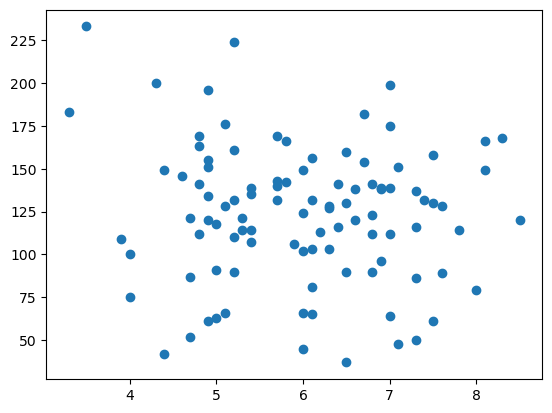

In [202]:
plt.scatter(dataset["cgpa"],dataset["iq"])

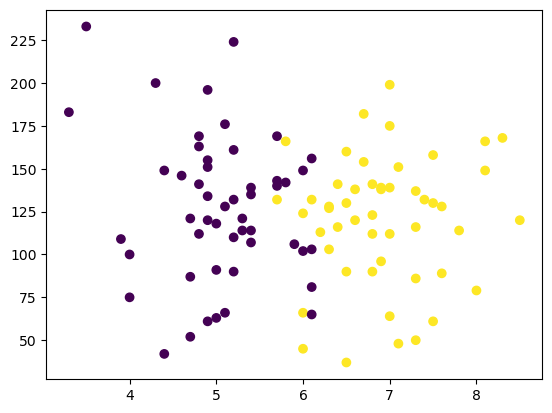

In [203]:
plt.scatter(dataset["cgpa"],dataset["iq"], c=dataset["placement"])
# yellow represent selected students

In [204]:
x = dataset.iloc[:,0:2]

In [205]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [206]:
y = dataset.iloc[:,-1]

In [207]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [210]:
x_train

,cgpa,iq
84,5.7,169.0
6,5.7,143.0
39,4.6,146.0
15,5.1,176.0
89,4.9,151.0
...,...,...
9,5.1,66.0
92,5.2,110.0
29,7.0,112.0
69,8.5,120.0


In [211]:
x_test

,cgpa,iq
25,5.0,91.0
38,6.5,160.0
27,6.0,124.0
8,6.1,156.0
81,5.4,107.0
2,5.3,121.0
87,5.7,132.0
75,4.8,169.0
26,7.0,199.0
73,4.9,61.0


In [212]:
y_train


84    0
6     0
39    0
15    0
89    0
     ..
9     0
92    0
29    1
69    1
63    1
Name: placement, Length: 90, dtype: int64

In [213]:
y_test

25    0
38    1
27    1
8     0
81    0
2     0
87    1
75    0
26    1
73    0
Name: placement, dtype: int64

In [214]:
# Scaling trainig data
from sklearn.preprocessing import StandardScaler

In [215]:
scaler = StandardScaler()

In [216]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.27877833,  1.16529694],
       [-0.27877833,  0.51170278],
       [-1.21752168,  0.58711749],
       [-0.79082015,  1.3412646 ],
       [-0.96150076,  0.71280867],
       [-0.87616046, -1.49935618],
       [-1.04684107, -0.26758257],
       [ 0.65996502, -0.26758257],
       [-0.87616046, -0.11675314],
       [ 0.57462472,  0.78822338],
       [ 0.65996502,  0.4614263 ],
       [ 1.94006959,  1.1401587 ],
       [-0.02275741,  0.6625322 ],
       [-1.81490381, -0.34299728],
       [-0.70547985,  0.96419104],
       [ 0.91598593,  0.71280867],
       [ 0.74530533,  0.41114983],
       [ 0.48928441, -0.06647667],
       [-1.7295635 , -0.56924141],
       [ 0.06258289,  0.23518217],
       [ 0.74530533, -0.66979436],
       [-1.13218137, -0.04133843],
       [-0.62013955, -0.21730609],
       [-0.96150076,  0.28545865],
       [ 0.83064563,  1.31612636],
       [-1.04684107,  0.4614263 ],
       [ 0.06258289, -1.04686791],
       [ 0.14792319, -0.24244433],
       [-0.70547985,

In [217]:
x_test = scaler.transform(x_test)
x_test

array([[-0.87616046, -0.79548554],
       [ 0.40394411,  0.93905281],
       [-0.02275741,  0.03407628],
       [ 0.06258289,  0.83849986],
       [-0.53479924, -0.39327375],
       [-0.62013955, -0.04133843],
       [-0.27877833,  0.23518217],
       [-1.04684107,  1.16529694],
       [ 0.83064563,  1.91944405],
       [-0.96150076, -1.54963265]])

In [218]:
# using logistic regression class
from sklearn.linear_model import LogisticRegression

In [219]:
clf = LogisticRegression()

In [220]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [221]:
# model evaluation
y_predict = clf.predict(x_test)

In [222]:
y_predict

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [223]:
y_test

25    0
38    1
27    1
8     0
81    0
2     0
87    1
75    0
26    1
73    0
Name: placement, dtype: int64

In [224]:
from sklearn.metrics import accuracy_score

In [225]:
accuracy_score(y_test,y_predict)

0.7

In [226]:
# vislualizing decision boundary
from mlxtend.plotting import plot_decision_regions

<Axes: >

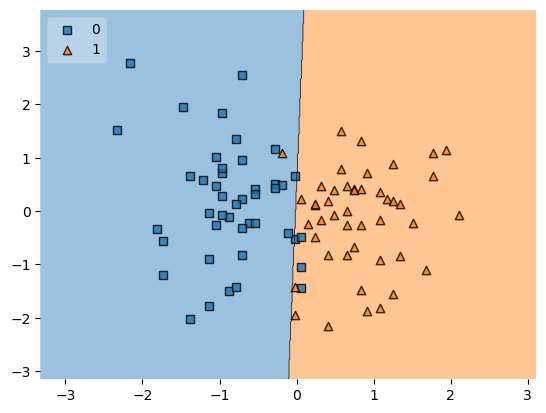

In [228]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [229]:
import pickle

In [232]:
# Exporting our model
pickle.dump(clf,open('model.pkl','wb'))

# The created model.pkl can be deployed into websites